# Are the distributions of Stocks Transaction Made by the US House of Representatives Disclosed in Year 2020 and Stocks Transaction Disclosed After Year 2020 different?



Lihao Liu, Zhen Fang

## Summary of Findings

### Introduction
The data is collected and maintained by Timothy Carambat as part of the House Stock Watcher project, and the dataset "all_transactions" contains data about the stock trades made by members of the US House of Representatives. It has 14180 observations and 12 variables; including the disclosure dates, transaction dates, owners, tickers, the full name of tickers, trade types, trade amounts, representatives, districts, and capital gains that are over 200 USD of stocks. Since the data are collected through reports from Members of Congress and are transcribed by the community of contributors, there might be unfaithful data contained within the dataset as not everyone might be totally honest about their reports, especially when associated with money. **Our question is are the distributions of stocks transaction made by the US House of Representatives disclosed in year 2020 and stocks transaction disclosed after year 2020 different?** 

Since we have the columns **"disclosure_year" and "type"**, we perform a permutation test based on the information provided and find out if the distributions of trade types differ significantly between 2020 and years after 2020.


### Cleaning and EDA
For data cleaning, first of all, we dropped columns "ptr_link", "asset_description" and "amount" so that our dataframe looks tidier since they are irrelevant to our project. Then, we **replaced all the "--" values with null**. Furthermore, since we are comparing between 2020 and years after 2020 (containing both 2021 and 2022), we also changed the "disclosure_year" column from [2020,2021,2022] to [2020, 2021]. We changed 2022 into 2021 and treated them as the same group. So in our case, all stocks disclosed in either 2021 or 2022 are displayed as 2021 in "disclosure_year" column. 

For columns "disclosure_year" and "type", we looked at both of their distributions and found that there are no unreasonable values and strings, so we don't need to get rid of any unreasonable values and this makes things easy for us to analyze. Also, since the amounts of stocks disclosed in 2020 and in years after 2020 are quite different, we decided to compare the distributions of stocks in two periods through the proportions rather than the number of stocks. Moreover, we assumed that there might be unfaithful data as people tend to lie when dealing with money. Indeed, after analyzing the amount range reported by representatives,  we found very doubtful fact from the dataset that proves unfaithful data exists. But since our question is not related to representatives and the number of stock values, we can ignore the fact that some unfaithful data exists in the dataset.

### Assessment of Missingness
While cleaning the data, we notice the dataset has only one column with non-trivial missingness called "owner", which represents missing values with np.NaN and "--". However, **there is no NMAR column** because while the "owner" column contains a large amount of missing data, instead of randomly choose not to answer owner information, there are other possible factors like **representative, district, and cap gains**, that make the representatives choose to not answer such questions for their own benefit during data generating.<br>
After running simulations in permutation tests with **level of significance at 0.01** for better accuracy, the probability of the distributions of "cap_gains_over_200_usd", "district", and "representative" when "owner" is the same is 0.00, indicating that "owner" depends on all of the three columns. After running permutation test, we discover that owner largely dependend on the column "cap_gains_over_200_usd" and "district" because the observed total variation distance and stimulateed total variation cannot be drawn in one graph. The missingness might help us better analyze whether the congressmen hide their transaction information on purpose and what are the factors that lead to such decisions.


### Hypothesis Test
We perform a permutation test.The null hypothesis is **"the trade types of stocks disclosed in 2020 and trade types of those disclosed in 2021 and 2022 have the same distribution. The difference we saw was due to random chance"**, and the alternative hypothesis is **"the trade types of stocks disclosed in 2020 has different distribution from the trade types of those disclosed in 2021 and 2022"**.

Test statistic: Total variation distance

**Level of significance: 0.01 / 1%**

**Resulting p-value: 0.0**

Conclusion: Given that p-value is so small that is even smaller than our p-value cutoff, **we reject the null hypothesis** that "the trade types of stocks disclosed in 2020 and trade types of those disclosed in 2021 and 2022 have the same distribution. The difference we saw was due to random chance". To determine the further reason behind such a phenomenon, we'll look for more dataset for analysis. 

**The reason why TVD is an ideal test statistic is that we are comparing two categorical distributions. The level of significance is 0.01 rather than 0.05 because we want to be more strict on the significant level standard and arrive at a more convincing conclusion.**

In the future, we'll implement more datasets to create a more comprehensive resources to answer our questions and we might use dataset that is relative with stock market and Covid-19 Cases. 




## Code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

### Cleaning and EDA

First, we will import the csv file into the notebook so that we can manipulate and get data from the dataframe. Then, we will drop those unnecessary columns to make our dataframe look tidier.

In [2]:
df = pd.read_csv("all_transactions.csv").\
drop(columns = ["ptr_link", "asset_description", "amount"])
df.head()

,disclosure_year,disclosure_date,transaction_date,owner,ticker,type,representative,district,cap_gains_over_200_usd
0,2021,10/04/2021,2021-09-27,joint,BP,purchase,Hon. Virginia Foxx,NC05,False
1,2021,10/04/2021,2021-09-13,joint,XOM,purchase,Hon. Virginia Foxx,NC05,False
2,2021,10/04/2021,2021-09-10,joint,ILPT,purchase,Hon. Virginia Foxx,NC05,False
3,2021,10/04/2021,2021-09-28,joint,PM,purchase,Hon. Virginia Foxx,NC05,False
4,2021,10/04/2021,2021-09-17,self,BLK,sale_partial,Hon. Alan S. Lowenthal,CA47,False


Then, we will perform data cleaning by replacing all the meaningless values "--" with null. To make sure we successfully replaced all "--" values, we will record the number of null values in the dataframe and compare the number before and after conversion.

In [3]:
#The number of null values before data cleaning
df.isna().sum()

disclosure_year              0
disclosure_date              0
transaction_date             0
owner                     5322
ticker                       0
type                         0
representative               0
district                     0
cap_gains_over_200_usd       0
dtype: int64

As we can see, the number of null values increases, so we successfully replaced "--" with null.

In [4]:
#The number of null values after data cleaning
df = df.replace("--", np.NaN)
df.isna().sum()

disclosure_year              0
disclosure_date              0
transaction_date             0
owner                     6637
ticker                    1137
type                         0
representative               0
district                     0
cap_gains_over_200_usd       0
dtype: int64

Now, we are going to change all "2022" into "2021" in the "disclosure_year" column to represent the single group "years after 2020". 

In [5]:
df["disclosure_year"].value_counts()

2020    7379
2021    5520
2022    1281
Name: disclosure_year, dtype: int64

As we can see, before transformation, there are 5520 "2021" and 1281 "2022", and there are 6801 "2021" after transformation.

In [6]:
df["disclosure_year"] = df["disclosure_year"].replace(2022, 2021)
df["disclosure_year"].value_counts()

2020    7379
2021    6801
Name: disclosure_year, dtype: int64

#### Univariate Analysis
Now, let's look at the columns relavent to our question ("disclosure_year" and "type") and see if there are any strange values or strings we need to take care of.

Firtsly, the following plot **"disclosure year in total"** demonstrates the distribution of total number of transactions in year 2020 and after 2020.

C:\Users\13269\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'disclosure year in total')]

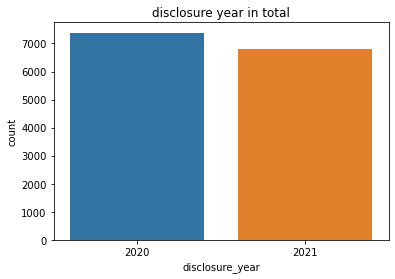

In [7]:
sns.countplot(df["disclosure_year"]).set(title = "disclosure year in total")
#make countplot to see if there are any strange values besides "2020" and "2021"

Secondly, the plot **"stock types in total"** demonstrates the types of total transcations and their total numeber according to each type of transaction.

C:\Users\13269\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'stock types in total')]

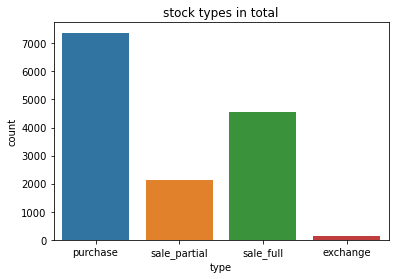

In [8]:
sns.countplot(df["type"]).set(title = "stock types in total")
#make countplot to see if there are any strange values in "type" column

The disclosure_year column only contains values "2020" and "2021", column "type" only contains "purchase","sale_partial","sale_full","exchange". We don't observe any strange values that we need to take care of in both "disclosure_year" and "type" columns

#### Bivariate Analysis
Now, let's look at both "disclosure_year" and "type" columns and see if there are any possible associations between distributions of stock types disclosed in 2020 and distributions of those disclosed after 2020. By doing this, we will create a barplot to see the proportions of each stock type in different years.

Since there are a different number of stocks disclosed in 2020 and in years after 2020 in the dataset, we can't compare the numbers above directly. We need to convert counts to proportions, separately for 2020 and 2021 stocks.

The plot **"Comparison between distributions of 2020 and 2021"** shows distributions of year 2020 and years after 2020 in different four types of transactions.

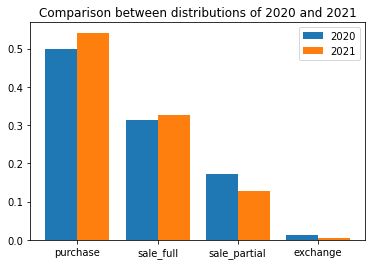

In [9]:
#the number of each stock types in two different periods
pivot_num = df.pivot_table(index='type', \
                           columns='disclosure_year', aggfunc='size')
#proportions of each stock type takes in year 2020
dist1 = df[df["disclosure_year"] == 2020]["type"].value_counts() /\
df[df["disclosure_year"] == 2020]["type"].value_counts().sum()
dist2 = df[df["disclosure_year"] == 2021]["type"].value_counts()\
/df[df["disclosure_year"] == 2021]["type"].value_counts().sum()
#create a barplot to visualize the distributions of tock types 
#disclosed in two different periods
types = ["purchase", "sale_full", "sale_partial", "exchange"]
p1 = [dist1]
p2 = [dist2]
x_axis = np.arange(len(types))
plt.bar(x_axis -0.2, dist1, width=0.4, label = '2020')
plt.bar(x_axis +0.2, dist2, width=0.4, label = '2021')
plt.xticks(x_axis, types)
plt.title("Comparison between distributions of 2020 and 2021")
plt.legend()
plt.show()

From the above plot, we can see that "purchase" type always takes the most proportion and "exchange" type always takes less in both of these periods. Moreover, we can see that the distributions of stock types are not so different in 2020 and years after 2020. However, we are not able to directly conclude that the distributions of stock types disclosed in 2020 are the same as  the distributions of stock types disclosed after 2020.

#### Aggregates

For this part, we will create pivot tables to visualize the exact numbers and proportions of each stock type disclosed in 2020 and years after 2020, and also create other pivot tables (if needed) to see if there are any other interesting phenomenon.

In [10]:
#pivot table shows the exact proportions of each 
#stock type disclosed in 2020 and years after 2020
df_pivot = df.pivot_table(index='disclosure_year', \
                          columns='type', values = 'disclosure_date', aggfunc='count')
df_pivot.T / list(df_pivot.sum(axis = 1))

disclosure_year,2020,2021
type,,
exchange,0.012332,0.004705
purchase,0.499661,0.541685
sale_full,0.314677,0.326423
sale_partial,0.173330,0.127187


When checking values of each column of our dataset, we find an interesting situation that there is an option "$1001 -" without upper limit, and some representatives reported their stocks with this range altogether for 242 times. Are they trying to hide the true values of their stocks? To make us easier to see, we will create a pivot table for the "amount" of stocks for each representative.

In [11]:
amount = pd.read_csv("all_transactions.csv")\
.groupby("amount").count()[["representative"]]
amount

,representative
amount,
"$1,000 - $15,000",4
"$1,000,000 +",28
"$1,000,000 - $5,000,000",1
"$1,000,001 - $5,000,000",38
"$1,001 -",242
"$1,001 - $15,000",9990
"$100,001 - $250,000",544
"$15,000 - $50,000",3
"$15,001 - $50,000",2235


pivot table for "amount" of stocks for each representative.

In [12]:
pivot_hider = pd.read_csv("all_transactions.csv").\
pivot_table(index='amount', columns='representative',
            values = 'disclosure_year', aggfunc='count').\
fillna(0).astype(int)
pivot_hider.head()

representative,Hon. Abigail Spanberger,Hon. Adam B. Schiff,Hon. Adam Kinzinger,Hon. Alan S. Lowenthal,Hon. Andrew Garbarino,Hon. Ann Wagner,Hon. Anthony E. Gonzalez,Hon. Aston Donald McEachin,Hon. August Lee Pfluger,Hon. Austin Scott,...,Mr. Peter Meijer,Mr. Scott Franklin,Mr. TJ John (Tj) Cox,Mrs. Marjorie Taylor Greene,None Ashley Hinson Arenholz,None Deborah K. Ross,None Kathy Manning,None Marie Newman,None Sara Jacobs,None Victoria Spartz
amount,,,,,,,,,,,,,,,,,,,,,
"$1,000 - $15,000",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"$1,000,000 +",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
"$1,000,000 - $5,000,000",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"$1,000,001 - $5,000,000",0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
"$1,001 -",0,0,0,227,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


To get a closer look at exactly who reported in "$1001-" range the most, we further dive down into the pivot table

In [13]:
#find those who reported with range "$1001 -"
pivot_hider.loc["$1,001 -"].sort_values(ascending = False)[:10]

representative
Hon. Alan S. Lowenthal             227
Hon. David B. McKinley               6
Hon. Mikie Sherrill                  5
Hon. Thomas Suozzi                   1
Hon. Susie Lee                       1
Hon. David E. Price                  1
Hon. Linda T. Sanchez                1
Hon. Neal Patrick MD, FACS Dunn      0
Hon. Michael Waltz                   0
Hon. Mike Kelly                      0
Name: $1,001 -, dtype: int32

As we can see, although most representatives did not choose to report with range "$1001-", there are in total 7 representatives who reported with this range. Since there is no upper limit shown, representatives may be able to hide the true values of their stocks so that maybe they can avoid taxes. Thus, leading by representative Alan S. Lowenthal, we may cast doubt on the true amount of stocks they disclosed and their motivations.

### Assessment of Missingness

In the dataset, the column "owner" has non-trivial missingness and we believe it's no NMAR since the missingness can depend on other factors like type of transaction, ticker, or even the transaction date, during data generation. The missingness can either be MAR or MACR. Thus, we will perform three permutation tests to analyze the dependency of missingness of this column on the other three columns, ticket, type, and transaction_date, and determine which column "owner" depend on the most.

Before performing permutation tests, we adds a column 'owner_missing' that uses boolean to indicate whether owner is missing.

In [14]:
copy_missing=  df.copy()
copy_missing['owner_missing']=copy_missing['owner'].isna()
copy_missing.head()

,disclosure_year,disclosure_date,transaction_date,owner,ticker,type,representative,district,cap_gains_over_200_usd,owner_missing
0,2021,10/04/2021,2021-09-27,joint,BP,purchase,Hon. Virginia Foxx,NC05,False,False
1,2021,10/04/2021,2021-09-13,joint,XOM,purchase,Hon. Virginia Foxx,NC05,False,False
2,2021,10/04/2021,2021-09-10,joint,ILPT,purchase,Hon. Virginia Foxx,NC05,False,False
3,2021,10/04/2021,2021-09-28,joint,PM,purchase,Hon. Virginia Foxx,NC05,False,False
4,2021,10/04/2021,2021-09-17,self,BLK,sale_partial,Hon. Alan S. Lowenthal,CA47,False,False


**Firstly**, we want to analyze the dependency of **owner** and **cap_gains_over_200_usd**.<br>
**Null hypothesis**: the distribution of "cap_gains_over_200_usd" when "owner" is missing is the same as the distribution of "cap_gains_over_200_usd" when "owner" is not missing. The differences is due to randomness.<br />
**Alternative hypothesis**: the distribution of "cap_gains_over_200_usd" when "owner" is missing is not the same as the distribution of "cap_gains_over_200_usd" when "owner" is not missing. The differences is not due to randomness.

We calculate the observed total variation distance, the stimulated total variation distance with 500 repeation, and the possibility of observed total variation distance is smaller or equal to stimulated total variation distance.

In [15]:
gain_dis = (copy_missing.pivot_table(index = 'cap_gains_over_200_usd',
                             columns = 'owner_missing',aggfunc = 'size'))
gain_dis = gain_dis/gain_dis.sum()
shuffled = copy_missing.copy()

n_repetitions = 500

tvds = []
for _ in range(n_repetitions):
    shuffled['cap_gains_over_200_usd']=np.random.permutation(
        shuffled['cap_gains_over_200_usd'])
    pivoted = shuffled.pivot_table(index = 'owner_missing',
                        columns = 'cap_gains_over_200_usd',
                                   aggfunc = 'size').apply(
        lambda x: x/x.sum(), axis = 1)
    tvds.append(pivoted.diff(axis = 1).iloc[:,-1].abs().sum()/gain_dis.shape[0])
obs_tvd = gain_dis.diff(axis = 1).iloc[:,-1].abs().sum()/gain_dis.shape[0]
pval= np.mean(tvds<=obs_tvd)
pval


0.0

In [16]:
tvds

[0.863856563936749,
 0.8634222302503466,
 0.864055633543017,
 0.8643270920970185,
 0.8642366059123513,
 0.863693688804348,
 0.863729883278215,
 0.8642004114384845,
 0.8638746611736825,
 0.863729883278215,
 0.8641280224907507,
 0.8644356755186192,
 0.8642728003862182,
 0.8643451893339519,
 0.8639108556475494,
 0.8640375363060835,
 0.8640918280168838,
 0.8638384666998156,
 0.8639832445952832,
 0.8639651473583497,
 0.864055633543017,
 0.8638022722259487,
 0.8637660777520818,
 0.8642908976231516,
 0.8639289528844829,
 0.8641280224907507,
 0.8640375363060835,
 0.8640737307799504,
 0.8637660777520818,
 0.8638384666998156,
 0.8637117860412815,
 0.8640013418322167,
 0.8641642169646175,
 0.8635308136719472,
 0.863729883278215,
 0.8642908976231516,
 0.8637479805151485,
 0.8644356755186192,
 0.8643813838078188,
 0.8639289528844829,
 0.863729883278215,
 0.8639108556475494,
 0.8648338147311548,
 0.863856563936749,
 0.8640918280168838,
 0.86401943906915,
 0.8639289528844829,
 0.8639470501214164,
 0.

After calculating possibility value as 0.00, we draw a histogram name "owner and cap_gains_over_200_usd: p_val: 0.00", and we can conclude that owner siginificantly depend of the column "cap_gains_over_200_usd"

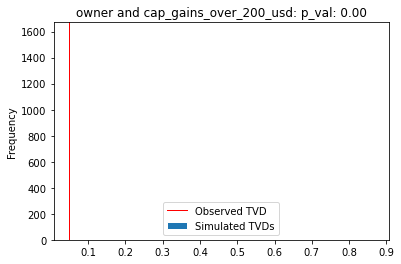

In [17]:
pd.Series(tvds).plot(kind='hist', density=True, ec='w',
                     title="owner and cap_gains_over_200_usd: p_val: 0.00",
                     label='Simulated TVDs',)
plt.axvline(x=obs_tvd, color='red', linewidth=1, label='Observed TVD')
plt.legend();

Since the p-value is 0.0, we reject the null hypothesis that the distribution of "cap_gains_over_200_usd" when "owner" is missing is the same as the distribution of "cap_gains_over_200_usd" when "owner" is not missing. Hence, we conlcude that the missingness of "owner" is depedent on "cap_gains_over_200_usd"

Secondly, we want to analyze the dependecy of **owner and disclosure_year** by comparing null and non-null 'owner' distribution for disclosure_year.

**Null hypothesis**: the distribution of "disclosure_year" when "owner" is missing is the same as the distribution of "disclosure_year" when "owner" is not missing. The differences is due to randomness.<br />
**Alternative hypothesis**: the distribution of "disclosure_year" when "owner" is missing is not the same as the distribution of "disclosure_year" when "owner" is not missing. The differences is not due to randomness.

In [18]:
disclo_dis = (copy_missing.pivot_table(index = 'disclosure_year',\
                                       columns = 'owner_missing',aggfunc = 'size'))
disclo_dis = disclo_dis/disclo_dis.sum()
shuffled = copy_missing.copy()

n_repetitions = 500

tvds = []
for _ in range(n_repetitions):
    shuffled['disclosure_year']=np.random.permutation(shuffled['disclosure_year'])
    pivoted = shuffled.pivot_table(index = 'owner_missing',
                                   columns = 'disclosure_year',\
                                   aggfunc = 'size').apply(lambda x: x/x.sum(), axis = 1)
    tvds.append(pivoted.diff(axis = 1).iloc[:,-1].abs().sum()/disclo_dis.shape[0])
obs_tvd = disclo_dis.diff(axis = 1).iloc[:,-1].abs().sum()/disclo_dis.shape[0]
pval= np.mean(tvds>=obs_tvd)
pval

0.0

the plot "owner and disclosure_year p_val:0.00" shows that owner is also depend on "disclosure_year"

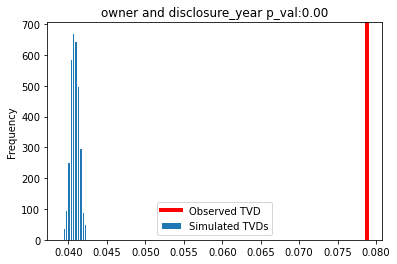

In [19]:
pd.Series(tvds).plot(kind='hist', density=True, ec='w',\
                     title="owner and disclosure_year p_val:0.00",
                     label='Simulated TVDs')
plt.axvline(x=obs_tvd, color='red', linewidth=4, label='Observed TVD')
plt.legend();

Since the p-value is 0.0, we reject the null hypothesis that the distribution of "disclosure_year" when "owner" is missing is the same as the distribution of "disclosure_year" when "owner" is not missing. Hence, we conlcude that the missingness of owner is depedent on "disclosure year"

Thirdly, we want to analyze the dependecy of **owner and district** by comparing null and non-null 'owner' distribution for district.<br>
**Null hypothesis**: the distribution of "district" when "owner" is missing is the same as the distribution of "district" when "owner" is not missing. The differences is due to randomness.<br />
**Alternative hypothesis**: the distribution of "district" when "owner" is missing is not the same as the distribution of "district" when "owner" is not missing. The differences is not due to randomness.

In [23]:
distri_dis = (copy_missing.pivot_table(index = 'district',\
                                       columns = 'owner_missing',aggfunc = 'size'))
distri_dis = distri_dis/distri_dis.sum()
shuffled = copy_missing.copy()

n_repetitions = 500

tvds = []
for _ in range(n_repetitions):
    shuffled['district']=np.random.permutation(shuffled['district'])
    pivoted = shuffled.pivot_table(index = 'owner_missing',
                                   columns = 'district',\
                                   aggfunc = 'size').apply(lambda x: x/x.sum(), axis = 1)
    tvds.append(pivoted.diff(axis = 1).iloc[:,-1].abs().sum()/distri_dis.shape[0])
obs_tvd = distri_dis.diff(axis = 1).iloc[:,-1].abs().sum()/distri_dis.shape[0]
pval= np.mean(tvds>=obs_tvd)
pval

0.0

the plot "owner and district pval: 0.0" shows that owner is also depend on "district"

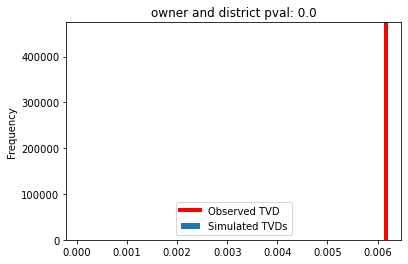

In [25]:
pd.Series(tvds).plot(kind='hist', density=True, ec='w', \
                     title="owner and district pval: 0.0", label='Simulated TVDs')
plt.axvline(x=obs_tvd, color='red', linewidth=4, label='Observed TVD')
plt.legend();

Since the p-value is 0.0, we reject the null hypothesis that the distribution of "district" when "owner" is missing is the same as the distribution of "district" when "owner" is not missing. Hence, we conlcude that the missingness of "owner" is depedent on "district"

Thus, owner missingness depend on cap_gains_over_200_usd, representative, and district since we reject the null hypothesises for the three permutation task and wonder whether congressmen made the similar distribution of stock transaction between year 2020 and years after 2020.

### Hypothesis Testing

Here, we will simulate the test statistics 1000 times and get a p-value from these 1000 simulations

In [292]:
#create a copy of original dataframe so that any changes we make won't be conducted to the original dataframe
df2 = df.copy()
#simulate n_repititions test statistics
n_repetitions = 1000
tvds = []
for i in range(n_repetitions):
    #1:shuffle the types
    shuffled_types = df["type"].sample(frac=1).reset_index(drop=True)
    
    #create the shuffled dataframe
    shuffled = df2.assign(**{'Shuffled type': shuffled_types})
    
    #compute the test statistic
    shuffled_dist1 = shuffled[shuffled["disclosure_year"] == 2020]["Shuffled type"]\
    .value_counts() / shuffled[shuffled["disclosure_year"] == 2020]\
    ["Shuffled type"].value_counts().sum()
    shuffled_dist2 = shuffled[shuffled["disclosure_year"] == 2021]["Shuffled type"]\
    .value_counts() / shuffled[shuffled["disclosure_year"] == 2021]["Shuffled type"]\
    .value_counts().sum()
    tvd = abs(shuffled_dist1 - shuffled_dist2).sum() / 2
    
    tvds.append(tvd)
#compute the observed test statistic
obs_dist1 = df[df["disclosure_year"] == 2020]["type"].value_counts() / \
df[df["disclosure_year"] == 2020]["type"].value_counts().sum()
obs_dist2 = df[df["disclosure_year"] == 2021]["type"].value_counts() / \
df[df["disclosure_year"] == 2021]["type"].value_counts().sum()
observed = abs(obs_dist1 - obs_dist2).sum() / 2
observed

0.053769645053712595

Here we get the p-value = 0, and to make the result easier to see, we create a plot to visualize our result.

In [293]:
#the p-value
pval = (tvds >= observed).sum() / n_repetitions
pval

0.0

The plot 'Sum of Absolute Differences in Proportions of Stock Types' shows the differences between p-value, p-value cutoff, and stimulated tvds.

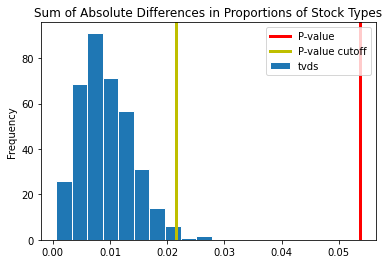

In [294]:
#plot a histogram visualizing our p-value result
title = 'Sum of Absolute Differences in Proportions of Stock Types'
pd.Series(tvds).plot(kind='hist', density=True, ec='w', bins=10, title=title, label = "tvds")
plt.axvline(x=observed, color='red', linewidth=3, label = "P-value")
perc = np.percentile(tvds, 99) # 1% significance level
plt.axvline(x=perc, color='y', linewidth=3, label='P-value cutoff')

plt.legend();

Given that p-value is so small that is even smaller than our p-value cutoff, we reject the null hypothesis that "the trade types of stocks disclosed in 2020 and trade types of those disclosed in 2021 and 2022 have the same distribution. The difference we saw was due to random chance". 